# Hypothesis Testing - Cumulative Lab

## Introduction

In this cumulative lab, you will use pandas to clean up a dataset and perform some EDA, then perform statistical tests and interpret their results in order to answer some business questions.

## Objectives

You will be able to:

* Practice using a data dictionary
* Practice using pandas to prepare data for statistical analysis
* Practice identifying an appropriate statistical test for a given question
* Practice defining the null and alternative hypotheses
* Practice executing statistical tests and interpreting their results

## Your Task: Analyzing Health Trends

![tissues and tea mug](images/sick_day.jpg)

Photo by <a href="https://unsplash.com/@kellysikkema?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Kelly Sikkema</a> on <a href="/?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>

### Business Understanding

Flatiron Health Insurance (FHI) is a growing private healthcare insurance provider founded on the premise that using data and analytics can improve the health insurance industry by providing better care and offerings to its patients. Every year, the Center for Disease Control (CDC) conducts surveys to understand the latest demographic, health, and fitness trends. You have been tasked with analyzing the recently published results of the 2017-2018 survey and providing your recommendations back to the Chief Analytics Officer and Chief Marketing Officer. You have been assigned the task of taking a first look at the data and beginning to answer several key questions:
											 								
1. How does health status, represented by average number of days with bad physical health in the past month (`PHYSHLTH`), differ by state?					 								
2. Digging deeper into the data, what are some factors that impact health (demographics, behaviors, etc.)?	

### Data Understanding

To get you started, the IT department formatted the data set into a tab delimited text file for only NY, NJ, and CT (FHI’s primary markets) called `case_study.csv`.

There is also a PDF data dictionary called `data_dictionary.pdf`, which explains the meanings of the features and codes contained in this dataset.

Both files are located in the `data/` directory of this repository.

Prior to each statistical test, you will need to perform some data preparation, which could include:

* Filtering out rows with irrelevant values
* Transforming data from codes into human-readable values
* Binning data to transform it from numeric to categorical
* Creating new columns based on queries of the values in other columns

For steps 2-5, you will need to select and execute an appropriate statistical test. Recall these tests we have learned so far:

1. [Chi-squared test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html): used for comparing a categorical feature against a categorical feature, to determine whether they are independent
2. [t-test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html): used for comparing two categories of a numeric feature, to determine whether their means are the same across categories
3. [ANOVA](https://www.statsmodels.org/stable/generated/statsmodels.stats.anova.anova_lm.html#statsmodels.stats.anova.anova_lm): used for comparing more than two categories of a numeric feature, to determine whether their means are the same across categories

### Requirements

#### 1. Prepare `PHYSHLTH` Data for Analysis

Using the data dictionary, ensure that you understand the meaning of the `PHYSHLTH` column. Then clean the data so that only valid records of `PHYSHLTH` remain.

#### 2. Describe the Distribution of Health Status by State

Does health status (`PHYSHLTH`) differ by state (`STATE_`)? If so, by how much, and is it statistically significant?

#### 3. Describe the Relationship between Health Status and Home Ownership Status

Does health status (`PHYSHLTH`) differ between home owners and renters (`RENTHOM1`)? If so, by how much, and is it statistically significant?

#### 4. Describe the Relationship between Chronic Sickness and Nicotine Use

Does chronic sickness (`PHYSHLTH >= 15`) differ based on nicotine use (various columns)? If so, by how much, and is it statistically significant?

#### 5. Choose Your Own Question

Thinking about the business case, what is another question that might be useful to answer? Perform all analysis steps to answer this question.

## 1. Prepare `PHYSHLTH` Data for Analysis

In the cells below, we include the relevant imports and load the data into a dataframe called `df`:

In [32]:
# Run this cell without changes
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [33]:
# Run this cell without changes
df = pd.read_csv("data/case_study.csv", index_col=0, low_memory=False)
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
49940,9.0,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,3.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0
49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0


Our main column of interest is called `PHYSHLTH`. We display summary statistics and plot a distribution below:

In [34]:
# Run this cell without changes
df['PHYSHLTH'].describe()

count    34545.000000
mean        60.213403
std         37.504566
min          1.000000
25%         15.000000
50%         88.000000
75%         88.000000
max         99.000000
Name: PHYSHLTH, dtype: float64

What PHYSHLTH should be

Valid answers are 0–30 days of bad physical health (integers).

Why your describe() looks impossible

Median (50%) = 88 → 88 is a code meaning “None (0 days)”, not 88 days.

Max = 99 → 99 is a code for “Refused”.

Min = 1 → because true zeros were coded as 88, there are no 0s left, so the smallest valid value showing up is 1.

Mean ~ 60 → inflated by the big code values (88, 99), not real days.

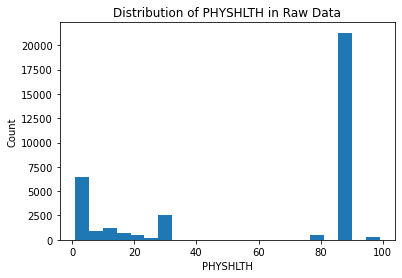

In [35]:
# Run this cell without changes
fig, ax = plt.subplots()
ax.hist(df["PHYSHLTH"], bins="auto")
ax.set_xlabel("PHYSHLTH")
ax.set_ylabel("Count")
ax.set_title("Distribution of PHYSHLTH in Raw Data");

This feature is supposed to represent the number of days with bad physical health out of the past 30 days. Do you see anything wrong with what is displayed above? Explain.

In [ ]:
# Replace None with appropriate text
"""
Yes, there is an issue. The PHYSHLTH column shows impossible values such as 88 and 99. 
According to the CDC coding, 88 means 'None' (0 days), 77 means 'Don't know', and 99 means 
'Refused'. Valid values should only be between 0 and 30 days. These codes need to be cleaned 
or recoded before we can analyze the data properly.
"""

In [40]:
## Look at the unique values in PHYSHLTH
df['PHYSHLTH'].unique()

array([88.,  2., 28.,  5., 30.,  4.,  3., 77., 15., 29.,  7., 10., 14.,
        6.,  1.,  8., 25., 99., 20., 12., 18., 27., 21., 19., 22.,  9.,
       13., 17., 11., 16., 24., 26., 23.])

In [41]:
#
df['PHYSHLTH'].value_counts().sort_index()

1.0      1538
2.0      1993
3.0      1187
4.0       622
5.0      1092
6.0       187
7.0       641
8.0        99
9.0        15
10.0      751
11.0        8
12.0       69
13.0       10
14.0      326
15.0      640
16.0       16
17.0       15
18.0       19
19.0       10
20.0      402
21.0       70
22.0       12
23.0        4
24.0        7
25.0      159
26.0        7
27.0       22
28.0       57
29.0       35
30.0     2438
77.0      493
88.0    21296
99.0      305
Name: PHYSHLTH, dtype: int64

Look in the data dictionary, page 17, to understand what is happening with these values. Then edit the cell below so:

* The records where the `PHYSHLTH` value label is `None` are converted to 0
* The records where the `PHYSHLTH` value label is `Number of days` are kept as-is
* All other records are dropped (i.e. records with `Don't know/Not sure`, `Refused`, and `Not asked or Missing` value labels for `PHYSHLTH` are dropped)

In [42]:
# Your code here

# Convert 'None' (88) to 0
df["PHYSHLTH"] = df["PHYSHLTH"].replace(88, 0)

# Keep only valid number of days (0–30), drop others (77, 99, missing)
df = df[(df["PHYSHLTH"] >= 0) & (df["PHYSHLTH"] <= 30)]



Run the code below to ensure you have the correct, cleaned dataframe:

In [43]:
# Run this cell without changes

# We should have fewer rows, the same number of columns
assert df.shape == (33747, 358)

# The maximum value in this column should now be 30
assert df["PHYSHLTH"].max() == 30.0

Now we can look at the same descriptive information on our cleaned data:

In [44]:
# Run this cell without changes
df['PHYSHLTH'].describe()

count    33747.000000
mean         4.085341
std          8.513293
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

Let’s break down what your cleaned summary stats mean now:

count = 33,747 → You dropped the invalid codes, but still have a large sample.

mean = 4.09 days → On average, people reported about 4 days of bad physical health in the past month.

std = 8.51 → There’s a lot of variation; some people report 0, some report close to 30.

min = 0 → Now you have proper 0 values (remember those used to be coded as 88).

median (50%) = 0 → At least half of respondents said they had no bad health days at all.

75% = 3 → 75% of people had 3 or fewer bad health days.

max = 30 → Correct, the maximum possible.

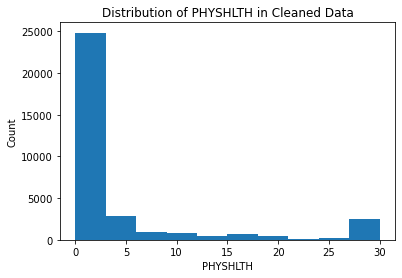

In [45]:
# Run this cell without changes
fig, ax = plt.subplots()
ax.hist(df["PHYSHLTH"])
ax.set_xlabel("PHYSHLTH")
ax.set_ylabel("Count")
ax.set_title("Distribution of PHYSHLTH in Cleaned Data");

That looks a lot more reasonable. Let's move on to the next step.

## 2. Describe the Distribution of Health Status by State

As mentioned previously, this dataset only includes data from three states.

In [46]:
# Run this cell without changes
df["_STATE"].value_counts()

36.0    11876
34.0    11458
9.0     10413
Name: _STATE, dtype: int64

Look in the data dictionary, pages 2-3, to determine which states map onto which codes. Then replace the numbers with strings representing the state names.

In [47]:
# Your code here
# Map state codes to names
state_map = {
    9: "Connecticut",
    34: "New Jersey",

    36: "New York"
}

df["_STATE"] = df["_STATE"].map(state_map)

Below, we check the values:

In [48]:
# Run this cell without changes

# Shape should be the same
assert df.shape == (33747, 358)

# Values in state column should be changed
assert sorted(list(df["_STATE"].value_counts().index)) == ['Connecticut', 'New Jersey', 'New York']

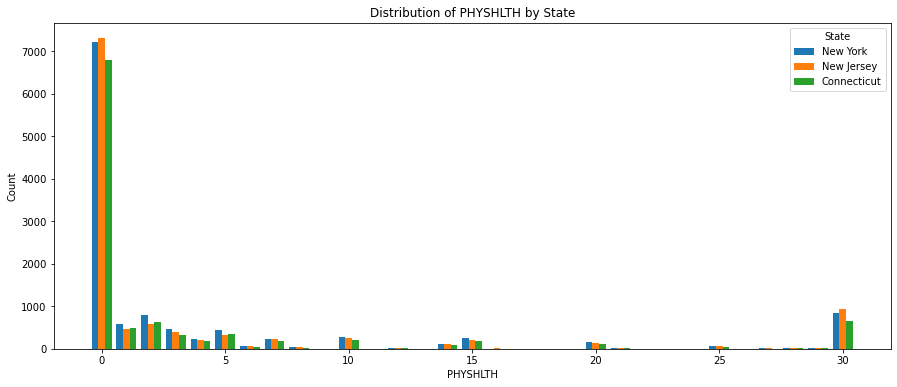

In [49]:
# Run this cell without changes

ny = df.loc[df["_STATE"] == "New York", "PHYSHLTH"]
nj = df.loc[df["_STATE"] == "New Jersey", "PHYSHLTH"]
ct = df.loc[df["_STATE"] == "Connecticut", "PHYSHLTH"]

fig, ax = plt.subplots(figsize=(15, 6))

ax.hist(
    x=[ny, nj, ct],
    label=["New York", "New Jersey", "Connecticut"],
    bins=range(32),
    align="left"
)

ax.set_xlabel("PHYSHLTH")
ax.set_ylabel("Count")
ax.set_title("Distribution of PHYSHLTH by State")

ax.legend(title="State");

Looking at the plot above, does the distribution seem to differ by state?

(Just answer based on a visual inspection; we will do the statistical assessment next.)

In [ ]:
# Replace None with appropriate text
"""
Based on visual inspection, the distributions look fairly similar across the three states. 
Most respondents in all states reported 0 bad health days, with the counts tapering off as 
the number of days increases. There may be slight differences in the tails (e.g., New Jersey 
seems to have a bit more respondents with higher bad health days), but overall the patterns 
are 

For the statistical test, we will be comparing the *means* of `PHYSHLTH` across states, as a representation of the overall distribution. In other words, when operationalizing the question **does `PHYSHLTH` differ by state?** we want to answer that in terms of the mean `PHYSHLTH`.

Let's look at those means:

In [50]:
# Run this cell without changes
df.groupby("_STATE")["PHYSHLTH"].mean()

_STATE
Connecticut    3.688562
New Jersey     4.380957
New York       4.148030
Name: PHYSHLTH, dtype: float64

You likely noted that the overall distribution looked about the same, but these means are different. We have a range from Connecticut with about 3.7 days of bad health to New Jersey with about 4.4 days. But is that difference statistically significant?

Identify which of the statistical tests you have learned is the most appropriate for this question, and why. Make sure you mention what kinds of variables are being compared (numeric and categorical), and how many categories there are.

In [ ]:
# Replace None with appropriate text
"""
The most appropriate test here is a one-way ANOVA. We are comparing the means of a numeric 
variable (PHYSHLTH = number of days with poor physical health) across more than two categories 
of a categorical variable (_STATE = Connecticut, New Jersey, New York). ANOVA is designed to 
test whether the differences in mean PHYSHLTH across these three states are statistically 
significant.
"""


Now, identify the null and alternative hypotheses:

# Variables:

Categorical variable → _STATE (3 groups: Connecticut, New Jersey, New York)

Numeric variable → PHYSHLTH (number of days of poor physical health in past 30 days)

Since you’re comparing means across more than 2 groups, we use ANOVA.

In [ ]:
# Replace None with appropriate text
"""
Null Hypothesis (H0): The mean PHYSHLTH is the same across Connecticut, New Jersey, and New York.  
Alternative Hypothesis (H1): At least one state has a different mean PHYSHLTH.  
"""

In the cell below, we set up and execute the statistical test for you. If this doesn't match your previous answer about which test to perform, look at the solution branch to understand why this is the appropriate test.

PHYSHLTH ~ C(_STATE) → This is a linear model formula. It says:
“Model PHYSHLTH as a function of _STATE (categorical).”

ols() → Fits an ordinary least squares regression.

anova_lm(lm) → Runs ANOVA on that regression to test if mean PHYSHLTH differs across states.

In [51]:
# Run this cell without changes
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = 'PHYSHLTH ~ C(_STATE)'
lm = ols(formula, df).fit()
sm.stats.anova_lm(lm)

,df,sum_sq,mean_sq,F,PR(>F)
C(_STATE),2.0,2.687322e+03,1343.660882,18.558645,8.800607e-09
Residual,33744.0,2.443093e+06,72.400809,NaN,NaN



Eplanation of that ANOVA Model
C(_STATE): Variation explained by the grouping variable _STATE.

Residual: Variation within groups (unexplained error).
Columns:
df = degrees of freedom
For _STATE, df = (number of states − 1) = 3 − 1 = 2.
For residual, df = total observations − groups = 33744.
sum_sq = sum of squares (total variability explained by factor or residual).
mean_sq = average variance = sum_sq / df.
F = test statistic = ratio of explained variance to residual variance = 18.56.
PR(>F) = p-value = 8.8e-09 (basically 0).

Interpret the results of this statistical test below. What is the calculated p-value? Were we able to reject the null hypothesis at an alpha of 0.05? What does this say about how `PHYSHLTH` varies by state? What recommendations would you make to the business?

In [ ]:
# Replace None with appropriate text
"""
Since p-value = 8.8e-09 < 0.05, we reject Null Hypothesis H₀ 
There is a statistically significant difference in mean 
physical health days across states.
"""

With that section wrapped up, let's move on to the next step.

## 3. Describe the Relationship between Health Status and Home Ownership Status

This time, we want to categorize respondents by demographic information: specifically, we'll look at whether or not they own their home.

Once again, this will require some data preparation. The variable of interest is contained in the `RENTHOM1` column. Currently the values look like this:

In [52]:
# Run this cell without changes
df["RENTHOM1"].value_counts()

1.0    21690
2.0    10244
3.0     1526
9.0      194
7.0       93
Name: RENTHOM1, dtype: int64

In the cell below, modify `df` so that we have dropped all records where the `RENTHOM1` value label is neither `Own` nor `Rent`, and we have replaced the numeric codes with `Own` and `Rent` respectively. You can find more information about codes on page 33 of the data dictionary.

From the RENTHOM1 column:

1.0 = Own

2.0 = Rent

3.0 = Other arrangement

7.0 = Don’t know

9.0 = Refused
So we need to:

Filter the dataframe to keep only rows where RENTHOM1 is 1.0 or 2.0.

Replace 1.0 with "Own" and 2.0 with "Rent".

Filtering rows safely

df["RENTHOM1"].isin([1.0, 2.0]) → creates a boolean mask (True/False) for rows where RENTHOM1 is either 1.0 or 2.0.

df.loc[...] → selects only those rows (so now we only keep "Own" and "Rent").

Without this, you’d still have NaN or other codes in your dataset.

In [53]:
# Your code here
df = df.loc[df["RENTHOM1"].isin([1, 2])].copy()


# Replace numbers with labels
df["RENTHOM1"] = df["RENTHOM1"].replace({1.0: "Own", 2.0: "Rent"})


In [54]:
# Run this cell without changes
df["RENTHOM1"].value_counts()

Own     21690
Rent    10244
Name: RENTHOM1, dtype: int64

Below, we check that this was done correctly:

In [55]:
# Run this cell without changes

# Number of rows should be smaller again
assert df.shape == (31934, 358)

# Only two values should be present in this column
assert sorted(list(df["RENTHOM1"].value_counts().index)) == ['Own', 'Rent']

Now, similar to the previous step, create a plot that shows the distribution of `PHYSHLTH` for those who own vs. rent their homes, including appropriate axis labels and legend. Because there is more of an imbalance of categories this time (more than twice as many owners as renters, compared to nearly-even numbers from New York, New Jersey, and Connecticut), make sure you add the argument `density=True`, so that the y-axis shows the density (proportion) rather than the count.

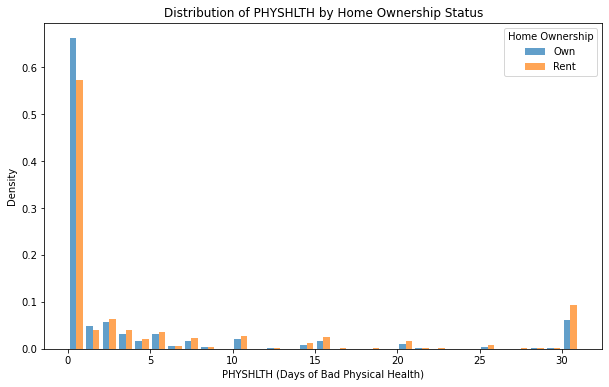

In [58]:
# Your code here

# Separate PHYSHLTH by ownership
own = df.loc[df["RENTHOM1"] == "Own", "PHYSHLTH"]
rent = df.loc[df["RENTHOM1"] == "Rent", "PHYSHLTH"]

# Plot histogram
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(
    [own, rent],               # Data for both groups
    bins=range(0, 32),         # Days 0-30
    density=True,              # Show proportions instead of counts
    label=["Own", "Rent"],     # Legend
    alpha=0.7                  # Slight transparency for overlap
)

# Labels and title
ax.set_xlabel("PHYSHLTH (Days of Bad Physical Health)")
ax.set_ylabel("Density")
ax.set_title("Distribution of PHYSHLTH by Home Ownership Status")

ax.legend(title="Home Ownership")
plt.show()


Then run this code to find the averages:

In [57]:
# Run this cell without changes
df.groupby("RENTHOM1")["PHYSHLTH"].mean()

RENTHOM1
Own     3.531213
Rent    5.197970
Name: PHYSHLTH, dtype: float64

Now, interpret the plot and averages. Does it seem like there a difference in the number of unhealthy days between those who rent their homes and those who own their homes? How does this compare to the distributions by state?

In [ ]:
# Replace None with appropriate text
"""
From the plot and the averages:

Renters have a higher average number of bad physical health days 5.2 compared to owners 3.5.  
The histogram shows that renters tend to have more days with poor health, while owners are 
more concentrated at lower PHYSHLTH values.  
Compared to the distributions by state, the difference between renters and owners is larger.  
  By state, the mean PHYSHLTH ranged only from 3.7 to 4.4 days,  
  Whereas by home ownership, the difference is 1.7 days, suggesting home ownership status might
  have a stronger association with health than state alone.
"""

Now, choose and execute an appropriate statistical test. Make sure you describe why you chose the test, the null and alternative hypotheses, and what the result of the test means.

In [29]:
# Your code here (create additional cells as needed)
#Comparing PHYSHLTH (numeric) between two groups
#Own vs Rent
#the outcome should be Numerical
#we use a t-test
#why we a comparind the means of two independent groups
#for instant if we want to see if the average bad health days differs between homeowners and renters

Define hypotheses

Null hypothesis (H₀)

There is no difference in mean PHYSHLTH between owners and renters.

Alternative hypothesis (H₁)

There is a difference in mean PHYSHLTH between owners and renters.

In [60]:

# Separate PHYSHLTH for the two groups
own = df.loc[df["RENTHOM1"] == "Own", "PHYSHLTH"]
rent = df.loc[df["RENTHOM1"] == "Rent", "PHYSHLTH"]

# Perform independent samples t-test
t_stat, p_value = stats.ttest_ind(own, rent)

print("t-statistic:", t_stat)
print("p-value:", p_value)


t-statistic: -16.435805439672
p-value: 1.878839256394904e-60


Explanation 
t-statistic: -16.44

The negative sign just indicates that the first group you provided (own) has a lower mean than the second group (rent).

The magnitude (16.44) is very large, meaning the difference between the group means is much larger than what we’d expect by chance, considering the variability in the data.

p-value: 1.88e-60

This is a very, very small number (essentially zero).

It tells us that the probability of observing such a difference in means if home ownership had no effect on PHYSHLTH is extremely low.

Conclusion

Reject the null hypothesis (H₀): there is a statistically significant difference in PHYSHLTH between owners and renters.


Renters have more days of bad physical health on average 5.2 days than owners 3.5 days.

The difference is not due to random chance; it is statistically significant.

Earlier, the difference in PHYSHLTH by state was smaller 0.7 days, whereas by home ownership it’s 1.7 days.

This suggests home ownership is more strongly associated with health status than state in this dataset.

## 4. Describe the Relationship between Chronic Sickness and Nicotine Use

Once again, this will require some preparation before we can run the statistical test. Create a new column `NICOTINE_USE` with 1 representing someone who uses or has used nicotine in some form, and 0 representing someone who hasn't.

We define nicotine use as:

* Answered `Yes` to the `SMOKE100` question (*Have you smoked at least 100 cigarettes in your entire life?*, page 43), OR
* Answered `Every day` or `Some days` to the `USENOW3` question (*Do you currently use chewing tobacco, snuff, or snus every day, some days, or not at all?*, page 46), OR
* Answered `Yes` to the `ECIGARET` question (*Have you ever used an e-cigarette or other electronic vaping product, even just one time, in your entire life?*, page 46)

If a record matches one or more of the above criteria, `NICOTINE_USE` should be 1. Otherwise, `NICOTINE_USE` should be 0. Go ahead and keep all of the "Don't know" or "Refused" answers as 0.

In [62]:
# Your code here
# Create NICOTINE_USE column
df["NICOTINE_USE"] = (
    (df["SMOKE100"] == 1) |  # Yes to smoked at least 100 cigarettes
    (df["USENOW3"].isin([1, 2])) |  # Every day or Some days use of smokeless tobacco
    (df["ECIGARET"] == 1)  # Yes to ever used e-cigarette
).astype(int)  # Convert boolean True/False to 1/0

# Check the counts
df["NICOTINE_USE"].value_counts()

# Look at the distribution of values
df["NICOTINE_USE"].value_counts(normalize=True)

0    0.563036
1    0.436964
Name: NICOTINE_USE, dtype: float64

(df["SMOKE100"] == 1) → True if respondent smoked ≥100 cigarettes in life.

(df["USENOW3"].isin([1,2])) → True if respondent uses smokeless tobacco every day or some days.

(df["ECIGARET"] == 1) → True if respondent ever used an e-cigarette.

| → Logical OR: if any of the three conditions is True, the person is considered a nicotine user.

.astype(int) → Converts True → 1, False → 0.

This time, let's treat health status as a categorical variable. We'll say that a "chronically sick" person is a person who reports that their physical health was not good for 15 or more out of the past 30 days. (This is a simplification but it will work for this analysis.)

In the cell below, create a new column of `df` called `CHRONIC`, which is 0 for records where `PHYSHLTH` is less than 15, and 1 for records where `PHYSHLTH` is 15 or more.

In [63]:
# Your code here
df["CHRONIC"] = (df["PHYSHLTH"] >= 15).astype(int)
# View the distribution of the newly-created column
df["CHRONIC"].value_counts()

0    28246
1     3688
Name: CHRONIC, dtype: int64

Now we can view the crosstabs for these two categorical variables, as well as display their distributions:

In [64]:
# Run this cell without changes
contingency_table = pd.crosstab(index=df["CHRONIC"], columns=df["NICOTINE_USE"])
contingency_table

NICOTINE_USE,0,1
CHRONIC,,
0,16332,11914
1,1648,2040


What this means:

Rows (CHRONIC):

0 → Not chronically sick (<15 bad health days)

1 → Chronically sick (≥15 bad health days)

Columns (NICOTINE_USE):

0 → Does not use nicotine

1 → Uses nicotine

Cells: Count of respondents in each category:

16332 → People who are not chronically sick and don’t use nicotine

11914 → Not chronically sick but do use nicotine

1648 → Chronically sick and don’t use nicotine

2040 → Chronically sick and use nicotine

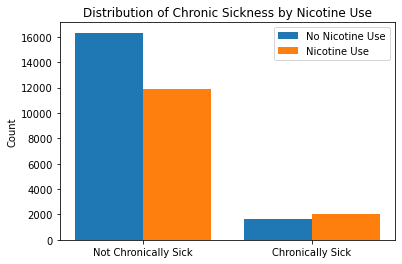

In [65]:
# Run this cell without changes

no_nicotine_use = df.loc[df["NICOTINE_USE"] == 0, "CHRONIC"]
nicotine_use = df.loc[df["NICOTINE_USE"] == 1, "CHRONIC"]

fig, ax = plt.subplots()

ax.hist(
    x=[no_nicotine_use, nicotine_use],
    label=["No Nicotine Use", "Nicotine Use"],
    bins=[0,1,2],
    align="left"
)

ax.set_ylabel("Count")
ax.set_xticks([0,1])
ax.set_xticklabels(["Not Chronically Sick", "Chronically Sick"])
ax.set_title("Distribution of Chronic Sickness by Nicotine Use")

ax.legend();

Once again, it appears that there is a difference in health outcomes between these categories. In the cell below, select an appropriate statistical test, describe the null and alternative hypotheses, execute the test, and interpret the result.

Hypotheses


Null hypothesis (H₀):
There is no association between nicotine use and being chronically sick. 

Alternative hypothesis (H₁):
There is an association between nicotine use and being chronically sick.

In [67]:
# Your code here (create additional cells as needed)
#chi-squared since chronic and nicotine use are categorical variables 
# Run chi-squared test

from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-squared statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

Chi-squared statistic: 228.22648537455362
p-value: 1.4525226945056695e-51
Degrees of freedom: 1
Expected frequencies:
 [[15903.52226467 12342.47773533]
 [ 2076.47773533  1611.52226467]]


Chi-squared statistic
This is a measure of how much the observed counts deviate from 
the counts we would expect if there were no association.
p-value: 1.45e-51
This is essentially 0, much smaller than the typical significance level of 0.05.
Degrees of freedom:
Since this is a 2×2 table (CHRONIC: 0/1, NICOTINE_USE: 0/1), 
the degrees of freedom = (rows−1) × (columns−1) = 1×1 = 1.    
Expected frequencies
These are the counts we would expect in each cell if there 
were no association between nicotine use and chronic sickness.
Compare these to the observed counts:


In [ ]:
# Your code here (create additional cells as needed)
"""
There is a statistically significant association between nicotine use and being chronically sick.
Nicotine users are more likely to be chronically sick than non-users.
The difference is not due to chance.

"""

## 5. Choose Your Own Question

Now that you have investigated physical health and chronic sickness and their relationships with state, home ownership, and nicotine use, you will conduct a similar investigation with variables of your choosing.

Select an independent variable based on looking at the information in the data dictionary, and perform any additional transformations needed to use it in an analysis. Then set up, execute, and interpret a statistical test that addresses the relationship between that independent variable and `PHYSHLTH`.

(There is no solution branch for this question, and feel free to move on if you have already spent more than 1.5 hours on this lab.)

Suppose we choose SEX (gender) as the independent variable.
This lets us test whether physical health differs between males and females.
Set Hypotheses

Null Hypothesis (H₀): There is no association between SEX (male/female) and PHYSHLTH.

Alternative Hypothesis (H₁): There is an association between SEX and PHYSHLTH.


Transform Variables

PHYSHLTH is numeric (number of unhealthy days). We can categorize it, e.g.:

0 = "Good health" (0–5 days unhealthy)

1 = "Poor health" (6+ days unhealthy)

Interpret

If p < 0.05 → reject H₀ → SEX is associated with physical health.

If p ≥ 0.05 → fail to reject H₀ → no evidence of association.

Chi-square is appropriate for two categorical variables.

In [68]:
# Categorize PHYSHLTH into Good (0–5 unhealthy days) vs Poor (6+ unhealthy days)
df["PHYSHLTH_CAT"] = df["PHYSHLTH"].apply(lambda x: 0 if x <= 5 else 1)

# Make a crosstab between SEX and PHYSHLTH
contingency_table = pd.crosstab(df["SEX"], df["PHYSHLTH_CAT"])
print(contingency_table)

# Run Chi-Square test
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square:", chi2)
print("Degrees of freedom:", dof)
print("p-value:", p)


PHYSHLTH_CAT      0     1
SEX                      
1.0           11749  2211
2.0           14493  3465
9.0              14     2
Chi-square: 64.51008702623399
Degrees of freedom: 2
p-value: 9.813243802787463e-15


PHYSHLTH_CAT = 0 → People reporting no unhealthy days (good health).

PHYSHLTH_CAT = 1 → People reporting ≥1 unhealthy days (poor health).

SEX = 1.0 → Male.

SEX = 2.0 → Female.

SEX = 9.0 → Unknown / missing category (tiny group).

So:

Among men: 11749 healthy vs 2211 unhealthy.

Among women: 14493 healthy vs 3465 unhealthy.

Unknown sex: just 16 total (tiny, not meaningful).

2. The Chi-square test results

Chi-square statistic = 64.51 → A measure of difference between expected vs observed counts. Bigger values → stronger evidence of association.

Degrees of freedom = 2 → Because 2 (sex categories) × 2 (health categories) = 4 cells, df = (rows-1)(cols-1) = 2.

p-value = 9.81 × 10⁻¹⁵ → Extremely small (way smaller than 0.05).

3. Interpreting p-value

If p > 0.05 → Fail to reject null (no evidence of association).

If p ≤ 0.05 → Reject null (evidence of association).


In [ ]:
"""
Here, p-value ≈ 0.0000000000000098, which is far below 0.05.
So we reject the null hypothesis.
There is no association between sex (male/female) and 
physical health status (good vs poor).
There is a statistically significant association between 
sex and physical health status.
"""

## Conclusion

Congratulations, another cumulative lab down! In this lab you practiced reading a data dictionary, performing various data transformations with pandas, and executing statistical tests to address business questions.